<a href="https://colab.research.google.com/github/Altamsh16/AI_PROJECTS/blob/main/Program1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

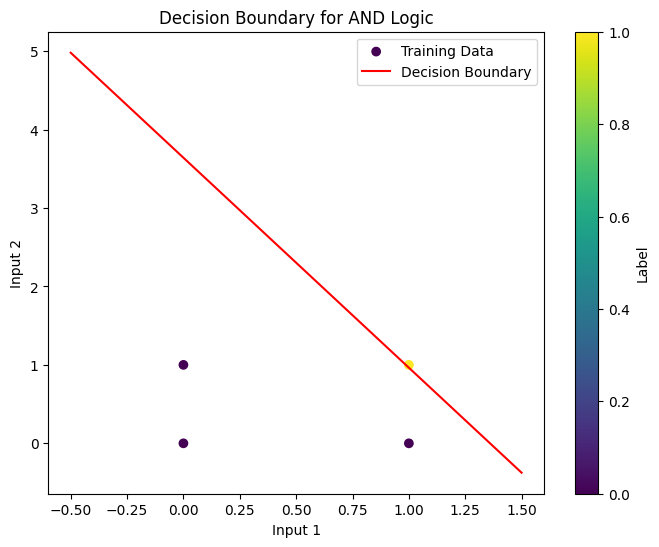

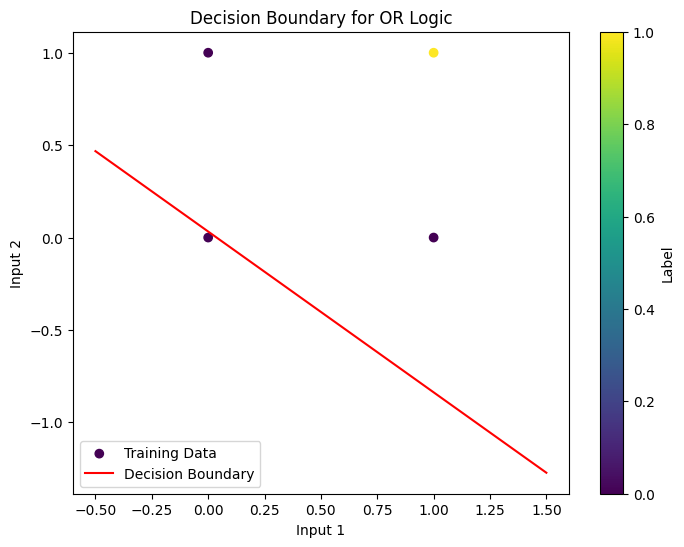

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # Initialize weights (including bias)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Weighted sum + bias
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  # Update bias

# Define the logical functions (AND and OR)
def logical_and(x):
    return int(x[0] and x[1])

def logical_or(x):
    return int(x[0] or x[1])

# Prepare training data for AND and OR logic gates
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_and = np.array([logical_and(x) for x in training_inputs])
labels_or = np.array([logical_or(x) for x in training_inputs])

# Train perceptrons for AND and OR logic gates
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(training_inputs, labels_and)

perceptron_or = Perceptron(input_size=2)
perceptron_or.train(training_inputs, labels_or)

# Visualize decision boundaries for AND and OR logic gates
def plot_decision_boundary(perceptron, logic_gate):
    plt.figure(figsize=(8, 6))
    plt.title(f"Decision Boundary for {logic_gate} Logic")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels_and, cmap='viridis', label="Training Data")

    # Plot decision boundary
    x_values = np.linspace(-0.5, 1.5, 100)
    y_values = -(perceptron.weights[1] * x_values + perceptron.weights[0]) / perceptron.weights[2]
    plt.plot(x_values, y_values, label="Decision Boundary", color='red')

    plt.legend()
    plt.colorbar(label="Label")
    plt.show()

# Plot decision boundaries for AND and OR logic gates
plot_decision_boundary(perceptron_and, "AND")
plot_decision_boundary(perceptron_or, "OR")
